## Yuting Huang homework 8

In [322]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import numpy as np
import bqplot
import ipywidgets
import contextily as ctx

### Geopandas with Bozeman city

In [323]:
#https://public-bozeman.opendata.arcgis.com/datasets/bozeman::parks/explore?location=45.812308%2C-111.035507%2C9.82
# I import the park of Bozeman city geojson file
gdf_park = geopandas.read_file('https://opendata.arcgis.com/datasets/68bee3ce48b34379bf503d461724b721_0.geojson')

In [324]:
gdf_park

OBJECTID  ACRES_PLAT                           LOCATION FACILITYID  \
0           1      0.5677          ALDER CREEK NATURAL SPACE  PKP_00341   
1           2      0.0980          ALDER CREEK NATURAL SPACE  PKP_00001   
2           3      0.4400                     BROOKSIDE PARK  PKP_00002   
3           4      0.0640                     BROOKSIDE PARK  PKP_00003   
4           5      2.7200           HRDC (WEST BABCOCK PARK)  PKP_00004   
..        ...         ...                                ...        ...   
189       753      8.5360                       GARDNER PARK  PKP_00342   
190       754      7.7390                        MCLEOD PARK  PKP_00344   
191      1557      1.4728                          WESTBROOK  PKP_00352   
192      1956      3.4400   TRADITIONS SUBDIVISION PH 3 PARK  PKP_00353   
193      2752      0.3700  SE CORNER W VILLARD AND VALLEY DR  PKP_00354   

    created_user               created_date last_edited_user  \
0           None                       None            PARKS   
1           None                       None            PARKS   
2           None                       None            PARKS   
3           None                       None            PARKS   
4           None                       None      ENGINEERING   
..           ...                        ...              ...   
189        PARKS  2015-11-24T17:59:40+00:00      ENGINEERING   
190        PARKS  2015-11-24T17:59:56+00:00      ENGINEERING   
191        PARKS  2016-10-26T17:40:02+00:00            PARKS   
192        PARKS  2016-11-17T18:22:09+00:00            PARKS   
193        PARKS  2016-12-21T17:18:58+00:00            PARKS   

              last_edited_date  ACRES MAINTENANCE  ... Irrigated  \
0    2022-03-16T15:59:43+00:00   0.57  CONTRACTED  ...        No   
1    2022-03-16T15:59:29+00:00   0.11  CONTRACTED  ...        No   
2    2022-03-14T14:21:56+00:00   0.46        CITY  ...        No   
3    2022-03-14T14:21:56+00:00   0.07        CITY  ...        No   
4    2021-05-06T19:04:35+00:00   2.68        CITY  ...        No   
..                         ...    ...         ...  ...       ...   
189  2021-05-06T19:04:36+00:00   8.57      COUNTY  ...        No   
190  2021-05-06T19:04:36+00:00   7.76        CITY  ...        No   
191  2022-03-16T17:02:10+00:00   1.51  CONTRACTED  ...       Yes   
192  2022-03-16T17:02:12+00:00   3.48  CONTRACTED  ...       Yes   
193  2022-03-16T17:02:19+00:00   0.36  CONTRACTED  ...       Yes   

    Irrigation_Size Irrigation_Condition  Irrigation_Condition_Date  \
0                                    N/A  2018-11-30T09:22:10+00:00   
1                                    N/A  2018-11-30T09:09:32+00:00   
2                                    N/A  2018-11-29T08:02:45+00:00   
3                                    N/A  2018-11-29T08:03:22+00:00   
4                                    N/A  2018-11-29T08:03:38+00:00   
..              ...                  ...                        ...   
189                                  N/A  2018-11-29T06:48:42+00:00   
190                                  N/A  2018-11-30T09:31:53+00:00   
191          Medium                 Fair  2018-11-29T12:07:10+00:00   
192          Medium                 Fair  2018-11-29T12:04:49+00:00   
193           Small                 Fair  2018-11-29T08:22:24+00:00   

                                          PTMD_CLASS   Mow HOA_CONTACT  \
0    Natural Area/Open Lands, Linear Parks & Buffers  None         YES   
1    Natural Area/Open Lands, Linear Parks & Buffers  None         YES   
2                                          Mini-Park  None        None   
3                                          Mini-Park  None        None   
4                                  Neighborhood Park  None        None   
..                                               ...   ...         ...   
189                                Neighborhood Park  None        None   
190                                Neighborhood Park  None        None   

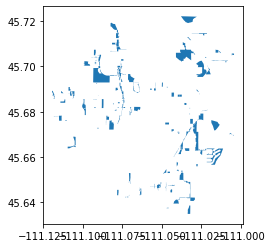

In [325]:
gdf_park.plot()

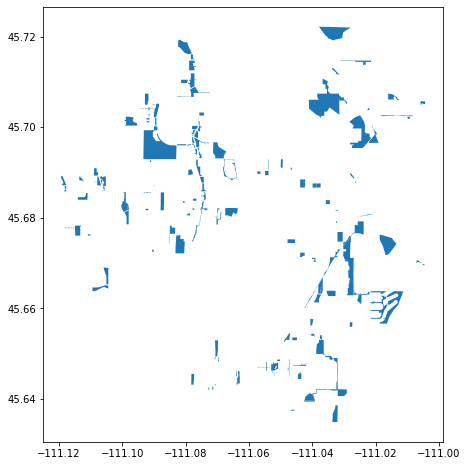

In [326]:
fig, ax = plt.subplots(figsize=(8, 8))
gdf_park.plot(ax=ax)
plt.show()

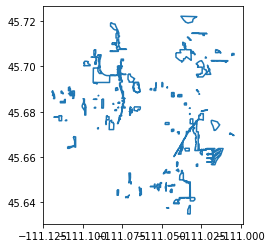

In [327]:
gdf_park.boundary.plot()

In [328]:
gdf_park.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [329]:
# I import the dog park of Bozeman city
gdf_dog_park = geopandas.read_file('https://opendata.arcgis.com/datasets/1931fd26d0cf4f0caee3173911ee9b5d_11.geojson')

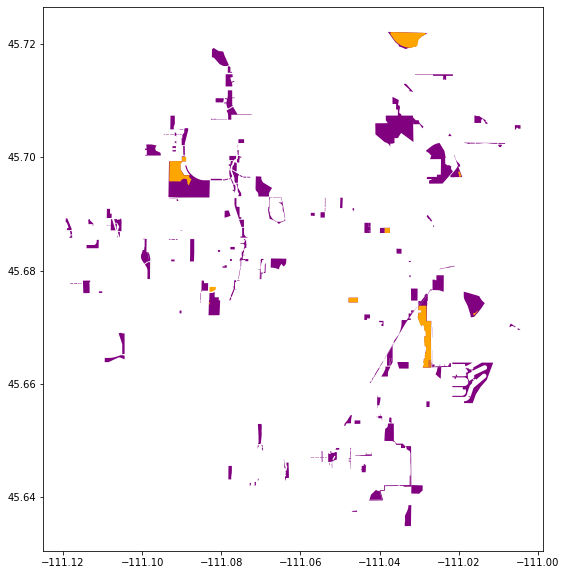

In [330]:
# I use park as base map and build the dog park on top
fig,ax = plt.subplots(figsize=(10,10))
gdf_park.plot(ax=ax, color='purple') 
gdf_dog_park.plot(ax=ax,color='orange') 
plt.show()

In [331]:
# Use contexily to transform to web mercator
# crs 4326 to 3857
gdf_park = gdf_park.to_crs(epsg=3857)

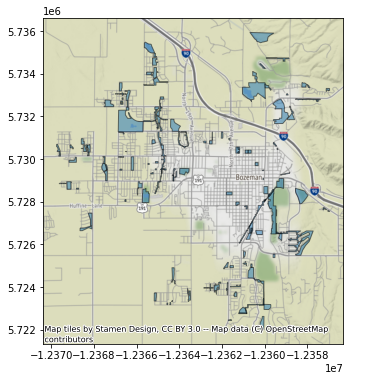

In [332]:
fig, ax = plt.subplots(figsize=(8,6))
gdf_park.plot(ax = ax, alpha=0.5, edgecolor='black')
ctx.add_basemap(ax=ax)
plt.show()

In [333]:
# old coordinate reference system: EPSG:4326
gdf_park = gdf_park.to_crs(epsg=4326)

/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


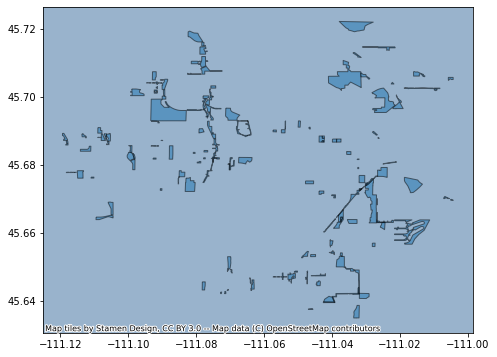

In [334]:
# I find out that the crs will influence the basemap, not only map size but also map color.
fig, ax = plt.subplots(figsize=(8,6))
gdf_park.plot(ax = ax, alpha=0.5, edgecolor='black')
#ctx.add_basemap(ax=ax, crs=gdf_park.crs)
ctx.add_basemap(ax=ax)
plt.show()

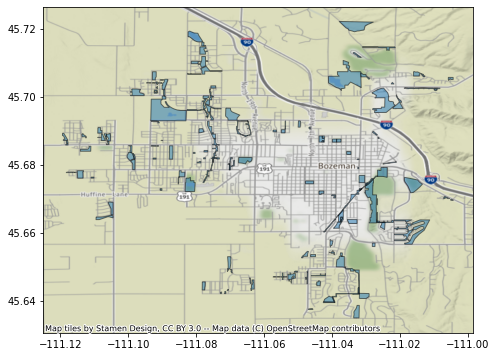

In [335]:
fig, ax = plt.subplots(figsize=(8,6))
gdf_park.plot(ax = ax, alpha=0.5, edgecolor='black')
ctx.add_basemap(ax=ax, crs=gdf_park.crs)
#ctx.add_basemap(ax=ax)
plt.show()

In [336]:
# I use the Bozeman building dataset
gdf_buildings = geopandas.read_file('https://opendata.arcgis.com/datasets/249b97f33743460eb228e8ab0e2cb195_0.geojson')

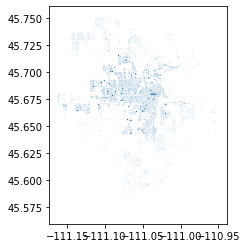

In [337]:
gdf_buildings.plot()

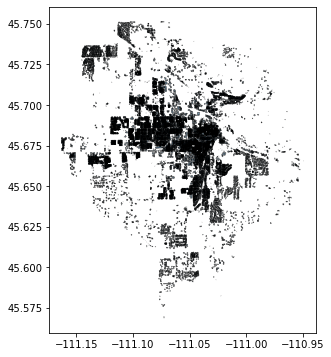

In [338]:
fig, ax = plt.subplots(figsize=(8,6))
gdf_buildings.plot(ax = ax, alpha=0.5, edgecolor='black')
#ctx.add_basemap(ax=ax)
plt.show()

In [339]:
gdf_buildings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [340]:
gdf_buildings = gdf_buildings.to_crs(epsg=3857)

In [341]:
gdf_buildings.head()

OBJECTID                 Ftype Building_Name    Height  \
0     91820  Residential Building          None  2.411965   
1     91821  Residential Building          None  4.915256   
2     91822  Residential Building          None  7.021082   
3     91823  Residential Building          None  4.452325   
4     91824  Residential Building          None  4.956187   

                                            geometry  
0  POLYGON ((-12370079.845 5738151.531, -12370085...  
1  POLYGON ((-12369473.168 5738160.576, -12369495...  
2  POLYGON ((-12370113.142 5738160.639, -12370119...  
3  POLYGON ((-12369685.313 5738137.955, -12369685...  
4  POLYGON ((-12369890.940 5738162.034, -12369902...

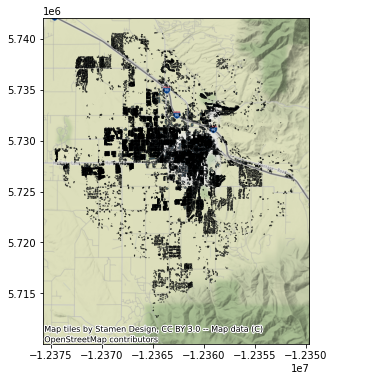

In [342]:
fig, ax = plt.subplots(figsize=(8,6))
gdf_buildings.plot(ax = ax, alpha=0.5, edgecolor='black')
ctx.add_basemap(ax=ax)
plt.show()

In [343]:
# I use the Bozeman city limit dataset
gdf_limit = geopandas.read_file('https://opendata.arcgis.com/datasets/0720922ab6f64ceda51661b7eb775c52_0.geojson')

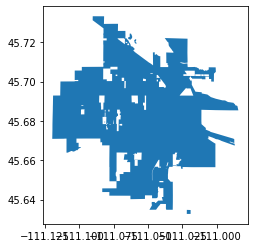

In [344]:
gdf_limit.plot()

In [345]:
gdf_limit.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [346]:
gdf_limit = gdf_limit.to_crs(epsg=3857)

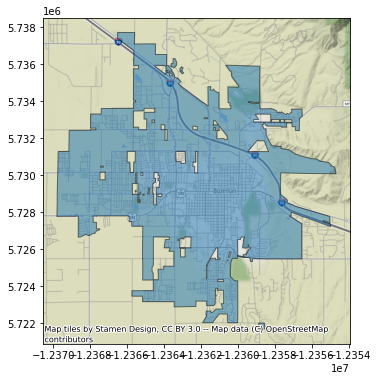

In [347]:
fig, ax = plt.subplots(figsize=(8,6))
gdf_limit.plot(ax = ax, alpha=0.5, edgecolor='black')
ctx.add_basemap(ax=ax)
plt.show()

In [348]:
# old coordinate reference system: EPSG:4326
gdf_limit = gdf_limit.to_crs(epsg=4326)

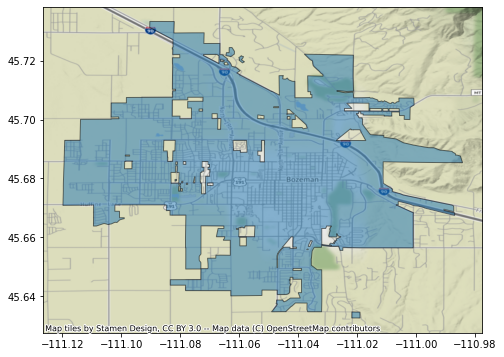

In [349]:
fig, ax = plt.subplots(figsize=(8, 6))
gdf_limit.plot(ax=ax, alpha=0.5, edgecolor='black')
ctx.add_basemap(ax=ax, crs=gdf_limit.crs)
plt.show()

In [350]:
gdf_buildings['Ftype'].unique()

array(['Residential Building', 'Commercial Building', 'Misc Building',
       'Educational Building', 'Medical Building', None, 'Residential'],
      dtype=object)

In [351]:
# change all "None" to "not specified"
gdf_buildings.loc[gdf_buildings['Ftype'].isnull(), 'Ftype'] = 'Not Specified'

In [352]:
gdf_buildings.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [353]:
gdf_buildings = gdf_buildings.to_crs(epsg=4326)

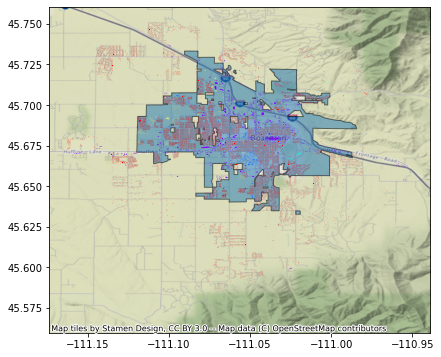

In [354]:
# Build a map with limit as basemap and buildings map 
fig, ax = plt.subplots(figsize=(8,6))

gdf_limit.plot(ax=ax,alpha=0.5,edgecolor='black') 
gdf_buildings.plot(column='Ftype',ax=ax, cmap='rainbow')
ctx.add_basemap(ax=ax,crs=gdf_limit.crs) 
plt.show()

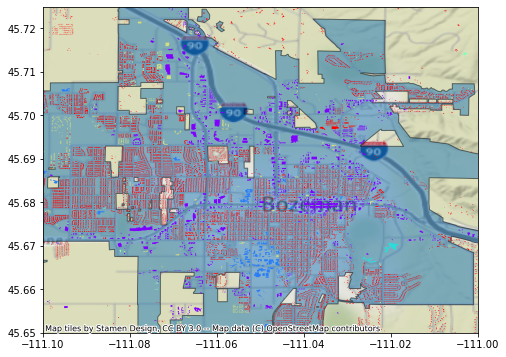

In [355]:
#zooming in
fig, ax = plt.subplots(figsize=(8,6))

gdf_limit.plot(ax=ax,alpha=0.5,edgecolor='black') 
gdf_buildings.plot(column='Ftype',ax=ax, cmap='rainbow') 
ctx.add_basemap(ax=ax,crs=gdf_limit.crs)
ax.set_xlim(-111.10, -111.00)
ax.set_ylim(45.650, 45.725)
plt.show()

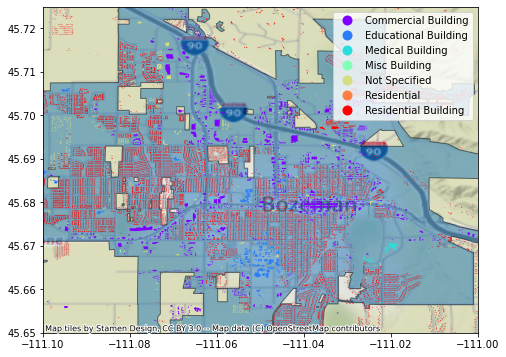

In [356]:
#give map with legend
fig, ax = plt.subplots(figsize=(8,6))

gdf_limit.plot(ax=ax,alpha=0.5,edgecolor='black') 
gdf_buildings.plot(column='Ftype',ax=ax, cmap='rainbow',
                  categorical=True, legend=True) 
ctx.add_basemap(ax=ax,crs=gdf_limit.crs) 

ax.set_xlim(-111.10, -111.00)
ax.set_ylim(45.650, 45.725)
plt.show()

In [357]:
gdf_park.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [358]:
btype = 'Misc Building'

gdf_buildings.loc[gdf_buildings['Ftype']==btype].head()

OBJECTID          Ftype Building_Name    Height  \
475     92295  Misc Building          None  5.031511   
476     92296  Misc Building          None  2.026008   
477     92297  Misc Building          None  3.204530   
478     92298  Misc Building          None  3.066292   
479     92299  Misc Building          None  1.433839   

                                              geometry  
475  POLYGON ((-111.06917 45.73685, -111.06924 45.7...  
476  POLYGON ((-111.08339 45.73710, -111.08341 45.7...  
477  POLYGON ((-111.08280 45.73720, -111.08303 45.7...  
478  POLYGON ((-111.08307 45.73727, -111.08315 45.7...  
479  POLYGON ((-111.06875 45.73742, -111.06877 45.7...

## create an interative function with limit and buildings maps

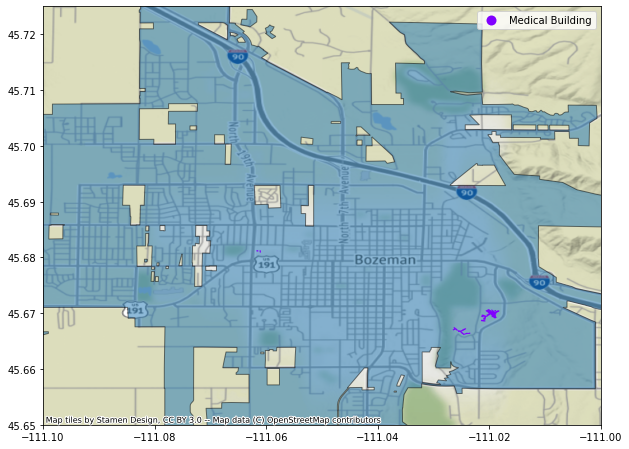

In [359]:
# step 1: hard code 
btype = 'Medical Building'

gdf_buildings_subset = gdf_buildings.loc[gdf_buildings['Ftype']==btype].head()

fig, ax = plt.subplots(figsize=(10, 8))
gdf_limit.plot(ax=ax,alpha=0.5,edgecolor='black') 
gdf_buildings_subset.plot(column='Ftype',ax=ax, cmap='rainbow',
                  categorical=True, legend=True) 
ctx.add_basemap(ax=ax,crs=gdf_limit.crs) 

ax.set_xlim(-111.10, -111.00)
ax.set_ylim(45.650, 45.725)
plt.show()


In [360]:
# Step 2: use this parameter as an input to a function

def geopandas_plot(btype):
    gdf_buildings_subset = gdf_buildings.loc[gdf_buildings['Ftype']==btype].head()

    fig, ax = plt.subplots(figsize=(10, 8))
    gdf_limit.plot(ax=ax,alpha=0.5,edgecolor='black') 
    gdf_buildings_subset.plot(column='Ftype',ax=ax, cmap='rainbow',
                  categorical=True, legend=True) 
    ctx.add_basemap(ax=ax,crs=gdf_limit.crs) 

    ax.set_xlim(-111.10, -111.00)
    ax.set_ylim(45.650, 45.725)
    plt.show()

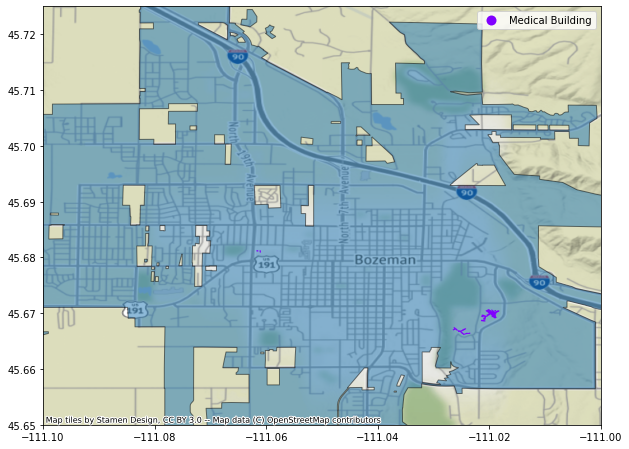

In [361]:
# step 2.5 -- try out the function
geopandas_plot('Medical Building')

In [362]:
# First, I define the geopands_plot function for changing building type on the limit basemap.
# Then, I add ipywidgets that allow viewers to select building type.
@ipywidgets.interact(btype=gdf_buildings['Ftype'].unique())

def geopandas_plot(btype):
    gdf_buildings_subset = gdf_buildings.loc[gdf_buildings['Ftype']==btype]

    fig, ax = plt.subplots(figsize=(10, 8))
    gdf_limit.plot(ax=ax,alpha=0.5,edgecolor='black') # councils on the bottom
    gdf_buildings_subset.plot(column='Ftype',ax=ax, cmap='rainbow',
                  categorical=True, legend=True) # plot apts on top
    ctx.add_basemap(ax=ax,crs=gdf_limit.crs) # passing data coordinate reference system

    ax.set_xlim(-111.10, -111.00)
    ax.set_ylim(45.650, 45.725)
    plt.show()

interactive(children=(Dropdown(description='btype', options=('Residential Building', 'Commercial Building', 'M…

In [363]:
gdf_park.head()

OBJECTID  ACRES_PLAT                   LOCATION FACILITYID created_user  \
0         1      0.5677  ALDER CREEK NATURAL SPACE  PKP_00341         None   
1         2      0.0980  ALDER CREEK NATURAL SPACE  PKP_00001         None   
2         3      0.4400             BROOKSIDE PARK  PKP_00002         None   
3         4      0.0640             BROOKSIDE PARK  PKP_00003         None   
4         5      2.7200   HRDC (WEST BABCOCK PARK)  PKP_00004         None   

  created_date last_edited_user           last_edited_date  ACRES MAINTENANCE  \
0         None            PARKS  2022-03-16T15:59:43+00:00   0.57  CONTRACTED   
1         None            PARKS  2022-03-16T15:59:29+00:00   0.11  CONTRACTED   
2         None            PARKS  2022-03-14T14:21:56+00:00   0.46        CITY   
3         None            PARKS  2022-03-14T14:21:56+00:00   0.07        CITY   
4         None      ENGINEERING  2021-05-06T19:04:35+00:00   2.68        CITY   

   ... Irrigated Irrigation_Size Irrigation_Condition  \
0  ...        No                                  N/A   
1  ...        No                                  N/A   
2  ...        No                                  N/A   
3  ...        No                                  N/A   
4  ...        No                                  N/A   

   Irrigation_Condition_Date                                       PTMD_CLASS  \
0  2018-11-30T09:22:10+00:00  Natural Area/Open Lands, Linear Parks & Buffers   
1  2018-11-30T09:09:32+00:00  Natural Area/Open Lands, Linear Parks & Buffers   
2  2018-11-29T08:02:45+00:00                                        Mini-Park   
3  2018-11-29T08:03:22+00:00                                        Mini-Park   
4  2018-11-29T08:03:38+00:00                                Neighborhood Park   

    Mow HOA_CONTACT ADDRESS Contacted  \
0  None         YES    None      None   
1  None         YES    None      None   
2  None        None    None      None   
3  None        None    None      None   
4  None        None    None      None   

                                            geometry  
0  POLYGON ((-111.05097 45.64871, -111.05117 45.6...  
1  POLYGON ((-111.04739 45.64873, -111.04739 45.6...  
2  POLYGON ((-111.07025 45.68026, -111.07025 45.6...  
3  POLYGON ((-111.07068 45.68025, -111.07068 45.6...  
4  MULTIPOLYGON (((-111.07010 45.68059, -111.0701...  

[5 rows x 43 columns]

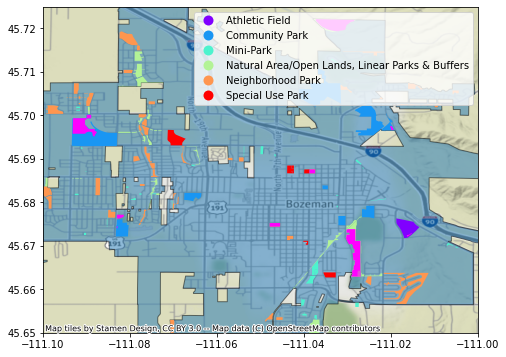

In [364]:
# I add the second layer on the map
fig, ax = plt.subplots(figsize=(8,6))

gdf_limit.plot(ax=ax,alpha=0.5,edgecolor='black') #basemap
gdf_park.plot(column='PTMD_CLASS',ax=ax, cmap='rainbow',
                  categorical=True, legend=True) #park map as first layer 
gdf_dog_park.plot(ax=ax,color='magenta') #dog park map as second layer
ctx.add_basemap(ax=ax,crs=gdf_limit.crs) 

ax.set_xlim(-111.10, -111.00)
ax.set_ylim(45.650, 45.725)
plt.show()

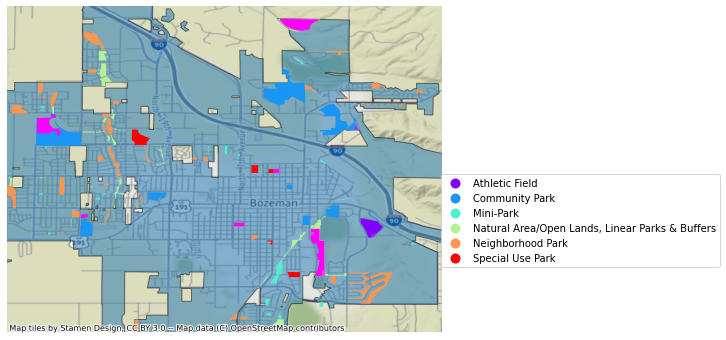

In [365]:
# Adjust legend location
#reference from: https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/
fig, ax = plt.subplots(figsize=(8,6))

gdf_limit.plot(ax=ax, alpha=0.5,edgecolor='black') 
gdf_park.plot(column='PTMD_CLASS',ax=ax, cmap='rainbow',
                  categorical=True, legend=True) 
gdf_dog_park.plot(ax=ax,color='magenta')
ctx.add_basemap(ax=ax,crs=gdf_limit.crs) 

ax.set_xlim(-111.10, -111.00)
ax.set_ylim(45.650, 45.725)

leg = ax.get_legend()   #adjust legend location to the right
leg.set_bbox_to_anchor((1.65,0.5))

ax.set_axis_off()

plt.show()

In [366]:
park_type = 'Community Park'

gdf_park.loc[gdf_park['PTMD_CLASS']==park_type].head()

OBJECTID  ACRES_PLAT               LOCATION FACILITYID created_user  \
14        52     82.9640  GLEN LAKE ROTARY PARK  PKP_00051         None   
36        87     12.3300              KIRK PARK  PKP_00086         None   
80       191      2.2000             BEALL PARK  PKP_00190         None   
81       193      7.4915            BOGERT PARK  PKP_00192         None   
82       194     24.1600           BOZEMAN POND  PKP_00193         None   

   created_date last_edited_user           last_edited_date  ACRES  \
14         None      ENGINEERING  2021-05-06T19:04:35+00:00  83.14   
36         None      ENGINEERING  2021-05-06T19:04:35+00:00  12.27   
80         None      ENGINEERING  2021-05-06T19:04:35+00:00   2.30   
81         None      ENGINEERING  2021-05-06T19:04:35+00:00   7.49   
82         None      ENGINEERING  2021-05-06T19:04:36+00:00  24.17   

   MAINTENANCE  ... Irrigated Irrigation_Size Irrigation_Condition  \
14        CITY  ...       Yes          Medium                 Fair   
36        CITY  ...       Yes          Medium                 Fair   
80        CITY  ...       Yes           Small                 Poor   
81        CITY  ...       Yes          Medium                 Fair   
82        CITY  ...       Yes          Medium                 Fair   

    Irrigation_Condition_Date      PTMD_CLASS  Mow HOA_CONTACT ADDRESS  \
14  2018-11-29T06:37:50+00:00  Community Park  YES        None    None   
36  2018-11-29T08:12:07+00:00  Community Park  YES        None    None   
80  2018-11-27T13:16:31+00:00  Community Park  YES        None    None   
81  2018-11-28T12:41:54+00:00  Community Park  YES        None    None   
82  2018-11-29T07:38:23+00:00  Community Park  YES        None    None   

   Contacted                                           geometry  
14      None  POLYGON ((-111.04109 45.70604, -111.04110 45.7...  
36      None  POLYGON ((-111.06748 45.68217, -111.06748 45.6...  
80      None  POLYGON ((-111.03574 45.68390, -111.03571 45.6...  
81      None  POLYGON ((-111.03207 45.67686, -111.03207 45.6...  
82      None  POLYGON ((-111.08300 45.67608, -111.08307 45.6...  

[5 rows x 43 columns]

## create an interative function with limit, park, and dog park maps

In [367]:
# First, I define park_type function for changing park type. 
# The map has two layers, basemap is limit map, the first layer is park map, the second layer is dog park map.
# I adjust the legend location to the top
# Then, add ipywidgets on the map
@ipywidgets.interact(park_type = gdf_park['PTMD_CLASS'].unique())

def park_type(park_type):

    gdf_park_subset = gdf_park.loc[gdf_park['PTMD_CLASS']==park_type]

    fig, ax = plt.subplots(figsize=(10, 8))
    gdf_limit.plot(ax=ax,alpha=0.5,edgecolor='black') 
    gdf_park_subset.plot(column='PTMD_CLASS',ax=ax, cmap='rainbow',
                  categorical=True, legend=True) 
    gdf_dog_park.plot(ax=ax,color='magenta')
    ctx.add_basemap(ax=ax,crs=gdf_limit.crs) 

    ax.set_xlim(-111.10, -111.00)
    ax.set_ylim(45.650, 45.725)
    
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((0.65,1.1))
    
    plt.show()

interactive(children=(Dropdown(description='park_type', options=('Natural Area/Open Lands, Linear Parks & Buff…

## create two interative functions with limit, park, and dog park maps
#### the first one is park_type
#### the second one is color_map

In [368]:
# I add a color_map interactive function on the map
def park_type(p_type, color_map):

    gdf_park_subset = gdf_park.loc[gdf_park['PTMD_CLASS']==p_type]

    fig, ax = plt.subplots(figsize=(10, 8))
    gdf_limit.plot(ax=ax,alpha=0.5,edgecolor='black') 
    gdf_park_subset.plot(column='PTMD_CLASS',ax=ax, cmap=color_map,
                  categorical=True, legend=True) 
    gdf_dog_park.plot(ax=ax,color='magenta')
    ctx.add_basemap(ax=ax,crs=gdf_limit.crs) 

    ax.set_xlim(-111.10, -111.00)
    ax.set_ylim(45.650, 45.725)
    
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((0.65,1.1))

    ax.set_axis_off()
    plt.show()

In [369]:
p_type = ipywidgets.Dropdown(options = list(gdf_park['PTMD_CLASS'].unique()), description = 'Select a park type:')
p_type.style.description_width = 'initial'
p_type

Dropdown(description='Select a park type:', options=('Natural Area/Open Lands, Linear Parks & Buffers', 'Mini-…

In [370]:
color_map = ipywidgets.Dropdown(options = plt.colormaps(), description = 'Select a color map')
color_map.style.description_width = 'initial'
color_map

Dropdown(description='Select a color map', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r'…

In [371]:
out1 = ipywidgets.interactive_output(park_type, {'p_type': p_type,'color_map':color_map})

## Final visualization

In [372]:
ipywidgets.VBox([p_type,color_map, out1])

### interesting explore function 

In [373]:
#reference: https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html
#This one I thought was very interesting.
#The explore function provides a powerful zooming function. When I hover over the map, it tells me the park type

gdf_park.explore(column="PTMD_CLASS", # make choropleth based on "PTMD_CLASS" column
     tooltip="PTMD_CLASS", # show "PTMD_CLASS" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="Set1", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black")) # use black outline)

## write-up

#### What are you trying to show?
I try to show an interactive map with Bozeman city (limit map), various parks, and dog parks. I build two interactive functions through the ipywidgets. The first function is for choosing the park type, and the second function is for changing the color map. Additionally, I adjust the legend position to the right side, so the legend would not block the map.
#### What projection are you using and why?
I use CRS 4326 projection in my final visualization. Even though I do not quite understand how the CRS function, I found out that 4326 will create a bigger size map. This is the reason I chose to use the 4326 instead 3857. Furthermore, I also found out in the previous map if CRS included in the function would influence the map’s color. 
#### What did you find interesting?
1.I found adding more maps on top is not difficult when using the geopands package

2.Geopandas is an interesting package that helps us to scrutinize the map

3.I found a useful and powerful function, named explore. I used explore function with the park type column in the park dataset. The explore function has a zooming in and zooming out function. Also, I do not have to set the legend, it will show up. Moreover, when I hover over the map, it tells me park type. This function is useful.
#### Who do you think would be interested in using this visualization?
I think everyone would be interested in this visualization.

1.Pet owners would love to find some animal-friendly parks for their pets.

2.Animal lovers would like to go dog parks.

3.Some who love exercising would love to use this map.
